In [1]:
from policy_mining import PolicyMining
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [4]:
NAME_DATASET = "AMZ"
FILE_NAME = None
USER_ATTRS = None
RESOURCE_ATTRS = None
th_rule_sim = None

# Settings for each dataset
if NAME_DATASET == "AMZ":
    FILE_NAME = "../../00-Data/train.csv"
    USER_ATTRS = ["MGR_ID", "ROLE_ROLLUP_1", "ROLE_ROLLUP_2", "ROLE_DEPTNAME",
                  "ROLE_TITLE", "ROLE_FAMILY_DESC", "ROLE_FAMILY", "ROLE_CODE"]
    RESOURCE_ATTRS = ["RID"]
    th_rule_sim = 1

elif NAME_DATASET == "HC":
    FILE_NAME = "../../00-Data/HC-AccessLog.csv"
    USER_ATTRS = ['role', 'specialty', 'team', 'uward', 'agentfor']
    RESOURCE_ATTRS = ['type', 'patient', 'treatingteam',
                      'oward', 'author', 'topic']
    th_rule_sim = 2

elif NAME_DATASET == "CAV":
    FILE_NAME = "../00-Data/CAV.csv"
else:
    print("Invalid Dataset")

pm = PolicyMining(FILE_NAME, NAME_DATASET, USER_ATTRS, RESOURCE_ATTRS)
pm.data_preprocessing()

File loaded! 

Cross-Validation - DONE
- k = 10
- Percentage Train-Test: 80.0 - 20.0
# Access requests in Train: 26215  %: 80.00
# Access requests in Test: 6554  %: 20.00
# Access requests: 32769


##############################
 PHASE 1: Data Preprocessing.
##############################


TASK 1: Done!

TASK 2: Done!

BEFORE
# (+) access requests: 24697  %: 94.21
# (-) access requests: 1518  %: 5.79
AFTER
# (+) access requests: 24697  %: 94.21
# (-) access requests: 1518  %: 5.79
TASK 3: Done!

|U|:  8826  -	|R|:  6670


In [5]:
def resize_distribution(prob_distribution, new_size):
    """
    Resize the probability distribution to a new size using linear interpolation.

    Parameters:
    - prob_distribution (list): The original probability distribution.
    - new_size (int): The desired size of the new probability distribution.

    Returns:
    - list: The resized probability distribution.
    """
    old_size = len(prob_distribution)

    # Create indices for the old and new arrays
    old_indices = np.linspace(0, old_size - 1, old_size)
    new_indices = np.linspace(0, old_size - 1, new_size)

    # Use linear interpolation to resize the distribution
    resized_distribution = np.interp(new_indices, old_indices, prob_distribution)

    # Normalize the distribution to ensure it sums to 1
    resized_distribution /= sum(resized_distribution)

    return resized_distribution


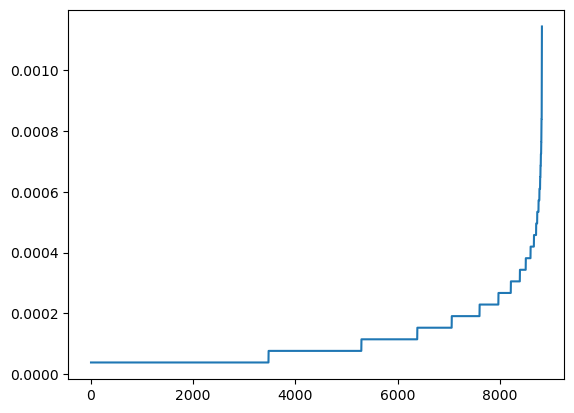

In [6]:
### USER Frequency distribution

to_plot = pm.df_train_k["UID"].value_counts(normalize=True, ascending=True)
plt.plot(range(len(to_plot)), to_plot)

In [7]:
n_bins = 120 # number of Users to map
test = list(to_plot.values)
resized_distribution = resize_distribution(test, n_bins)
print("Original Distribution:", test)
print("Resized Distribution:", resized_distribution)

Original Distribution: [3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.81460995

In [8]:
### Save the array values in a file

with open("users-distri", "wb") as fp:   #Pickling
    pickle.dump(resized_distribution, fp)

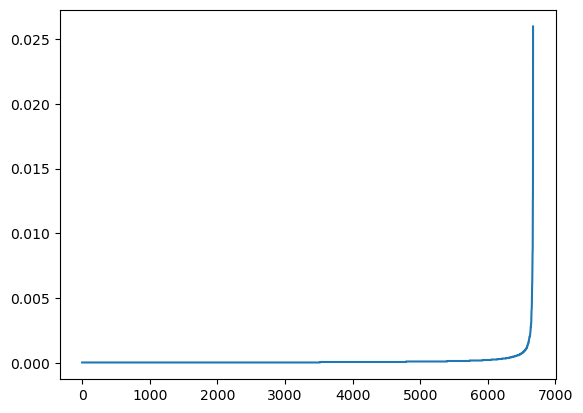

In [9]:
### RESOURCE Frequency distribution

to_plot = pm.df_train_k["RID"].value_counts(normalize=True, ascending=True)
plt.plot(range(len(to_plot)), to_plot)

In [10]:
n_bins = 990
test = list(to_plot.values)
resized_distribution = resize_distribution(test, n_bins)
print("Original Distribution:", test)
print("Resized Distribution:", resized_distribution)

Original Distribution: [3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.814609956131986e-05, 3.81460995

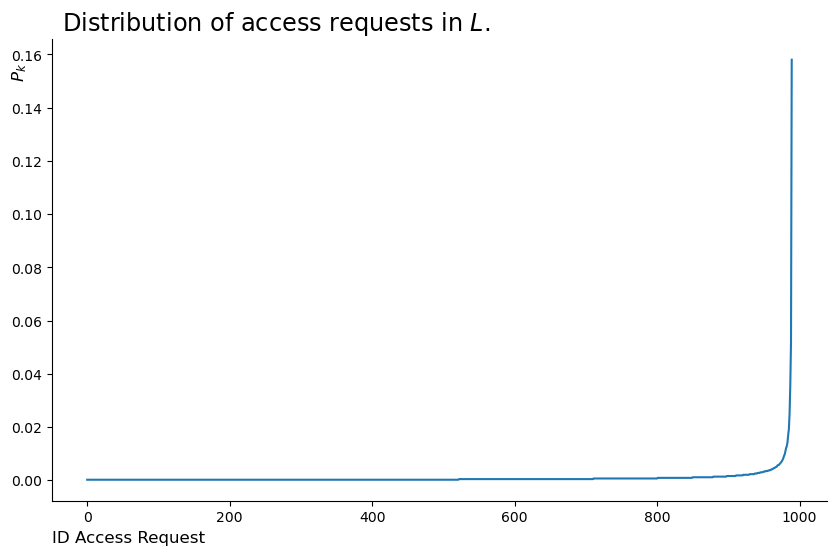

0.9999999999999992

In [11]:
### Selection only user-resource access requests

fig, ax = plt.subplots(figsize=(10, 6))
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(len(resized_distribution)), resized_distribution)
ax.set_xlabel('ID Access Request', loc="left", size="large")
ax.set_ylabel('$P_k$', loc="top", size="large", parse_math=True)
ax.yaxis.set_label_coords(-0.03,0.95)
ax.set_title("Distribution of access requests in $L$.", size="xx-large",  x=0.29, y=1, parse_math=True)
plt.show()
sum(resized_distribution)

In [12]:
### Save the array values in a file

with open("resrs-distri", "wb") as fp:   #Pickling
    pickle.dump(resized_distribution, fp)